In [2]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt

In [3]:
#setting parameters
img_size = 128
batch_size = 32
epochs = 15

### Data prepartion

In [24]:
#Cleaning data for invalid and corrupted file and speeding up with multithreading
from PIL import Image, UnidentifiedImageError
import os
import concurrent.futures

In [25]:
#Verifying each file from subfolders and checking if image is valid
def is_valid_image(path):
    try:
        with Image.open(path) as img:
            img.load()  # FULL decode
        return None  # OK
    except (OSError, UnidentifiedImageError, SyntaxError) as e:
        return path

In [26]:
def clean_dataset(dataset_path):
    all_files = []
    for root,_, files in os.walk(dataset_path):
        for file in files:
            full_path = os.path.join(root, file)
            all_files.append(full_path)

    # Thread pool — I/O bound, so threads are fine
    with concurrent.futures.ThreadPoolExecutor() as executor:
        bad_files = list(filter(None, executor.map(is_valid_image, all_files)))

    for file in bad_files:
        print(f"[DELETE] {file}")
        try:
            os.remove(file)
        except Exception as e:
            print(f"[WARN] Could not delete {file}: {e}")

    print(f"[DONE] Removed {len(bad_files)} corrupt images.")

In [27]:
clean_dataset('D:/Datasets/cnn_dataset')

[DELETE] D:/Datasets/cnn_dataset\Maize healthy\healthy189_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize healthy\healthy87_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf beetle\leaf beetle206_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf beetle\leaf beetle457_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf beetle\leaf beetle572_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf beetle\leaf beetle68_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf beetle\leaf beetle797_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf blight\leaf blight379_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf blight\leaf blight452_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf blight\leaf blight522_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf blight\leaf blight58_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf blight\leaf blight666_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf blight\leaf blight745_.jpg
[DELETE] D:/Datasets/cnn_dataset\Maize leaf blight\leaf blight82_.jpg
[DELETE] D:/Datasets/cnn_d

In [28]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=20,
    zoom_range=0.2,
    horizontal_flip=True
)

In [29]:
train_generator = train_datagen.flow_from_directory(
    'D:/Datasets/cnn_dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 17915 images belonging to 22 classes.


In [30]:
val_generator = train_datagen.flow_from_directory(
    'D:/Datasets/cnn_dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4468 images belonging to 22 classes.


### Model Training and Layers

In [31]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(img_size, img_size, 3)),
    MaxPooling2D(2,2),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D(2,2),
    Flatten(),
    Dense(128, activation='relu'),
    Dropout(0.5),
    Dense(train_generator.num_classes, activation='softmax')
])


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [32]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=epochs
)

Epoch 1/15


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


560/560 ━━━━━━━━━━━━━━━━━━━━ 750s 1s/step - accuracy: 0.1697 - loss: 2.7387 - val_accuracy: 0.3017 - val_loss: 2.2556
Epoch 2/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 728s 1s/step - accuracy: 0.3321 - loss: 2.1161 - val_accuracy: 0.3606 - val_loss: 1.9924
Epoch 3/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 697s 1s/step - accuracy: 0.3973 - loss: 1.8529 - val_accuracy: 0.4082 - val_loss: 1.8214
Epoch 4/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 1028s 2s/step - accuracy: 0.4465 - loss: 1.7027 - val_accuracy: 0.4393 - val_loss: 1.6770
Epoch 5/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 937s 2s/step - accuracy: 0.4780 - loss: 1.5868 - val_accuracy: 0.4465 - val_loss: 1.6350
Epoch 6/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 761s 1s/step - accuracy: 0.5115 - loss: 1.4884 - val_accuracy: 0.4617 - val_loss: 1.5702
Epoch 7/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 680s 1s/step - accuracy: 0.5420 - loss: 1.3908 - val_accuracy: 0.4897 - val_loss: 1.4890
Epoch 8/15
560/560 ━━━━━━━━━━━━━━━━━━━━ 557s 990ms/step - accuracy: 0.5537 - loss: 1.3237 - val_accuracy: 0

In [33]:
val_loss, val_acc = model.evaluate(val_generator)
print(f"Validation Accuracy: {val_acc:.4f}")

140/140 ━━━━━━━━━━━━━━━━━━━━ 133s 956ms/step - accuracy: 0.5727 - loss: 1.2879
Validation Accuracy: 0.5714


#### Not bad for a first model from scratch, 57% accuracy according to random guess is (1/22) = 4.5,  for  22 classes in our dataset
#### The way to improve this is by transfer learning, but let's see accuracy curves

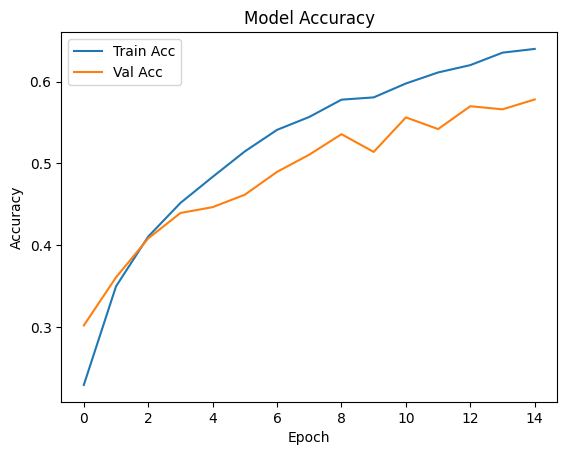

In [34]:
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [35]:
model.save("plant_disease_model.keras")

In [36]:
model.save("plant_disease_model.h5")

In [37]:
from tensorflow.keras.preprocessing import image
import numpy as np

img_path = 'C:/Users/User/Downloads/algal-spot-cashew.jpeg'
img = image.load_img(img_path, target_size=(img_size, img_size))
img_array = image.img_to_array(img)
img_array = np.expand_dims(img_array, axis=0) / 255.0

prediction = model.predict(img_array)
predicted_class = np.argmax(prediction)
class_labels = list(train_generator.class_indices.keys())
print(f"Predicted class: {class_labels[predicted_class]}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 265ms/step
Predicted class: Cashew anthracnose


### Let's see where our model is confused

In [39]:
from sklearn.metrics import classification_report

# Get true and predicted labels
y_true = val_generator.classes
y_pred = model.predict(val_generator)
y_pred_classes = y_pred.argmax(axis=1)

target_names = list(val_generator.class_indices.keys())
all_labels = list(range(22))
print(classification_report(y_true, y_pred_classes, labels=all_labels, target_names=target_names))

140/140 ━━━━━━━━━━━━━━━━━━━━ 166s 1s/step
                           precision    recall  f1-score   support

       Cashew anthracnose       0.08      0.06      0.07       345
           Cashew gumosis       0.00      0.00      0.00        78
           Cashew healthy       0.04      0.01      0.02       273
        Cashew leaf miner       0.08      0.10      0.09       275
          Cashew red rust       0.10      0.10      0.10       336
 Cassava bacterial blight       0.11      0.14      0.12       522
       Cassava brown spot       0.07      0.08      0.08       296
       Cassava green mite       0.03      0.04      0.04       203
          Cassava healthy       0.06      0.07      0.06       238
           Cassava mosaic       0.03      0.02      0.02       241
      Maize fall armyworm       0.00      0.00      0.00        57
         Maize grasshoper       0.04      0.04      0.04       134
            Maize healthy       0.01      0.05      0.02        40
        Maize leaf 

C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_classification.py:1531:

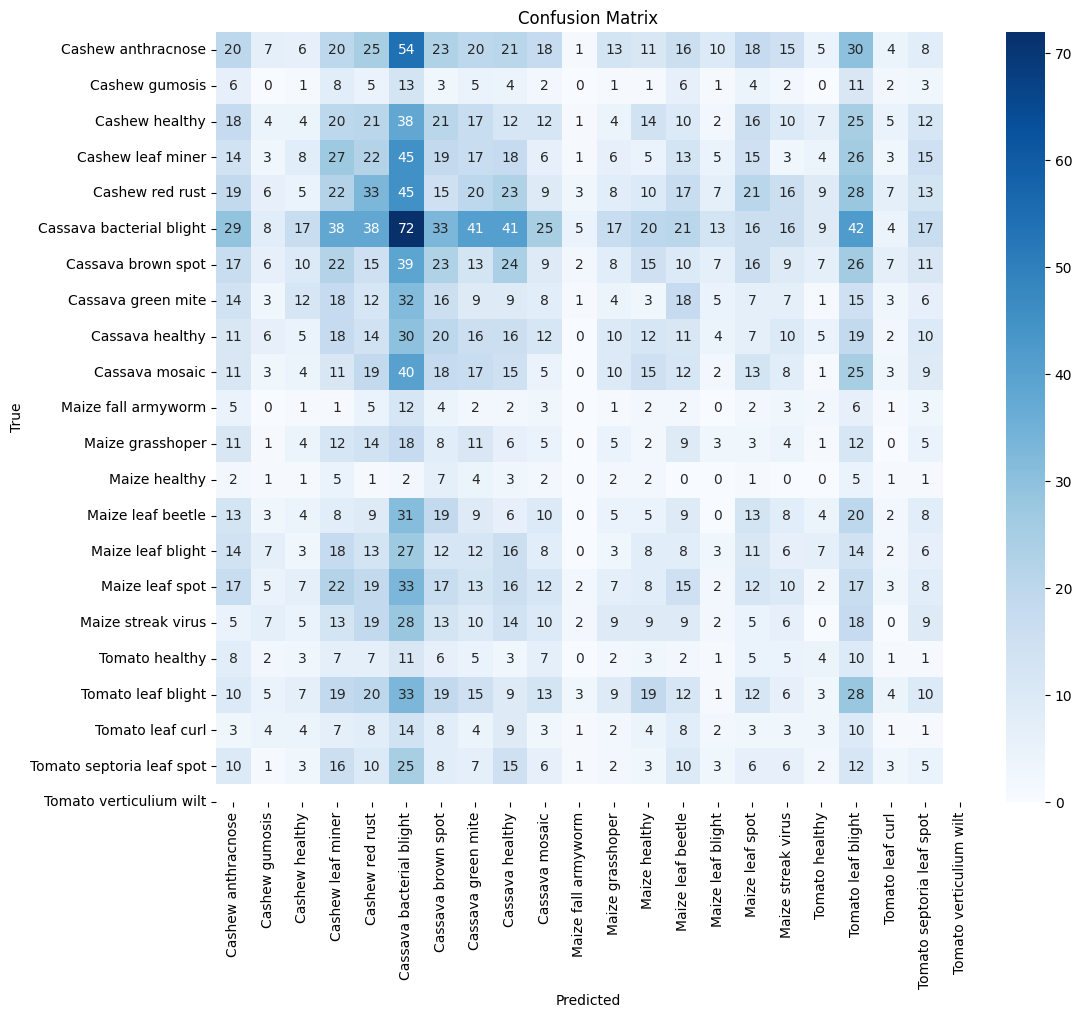

In [40]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=target_names, yticklabels=target_names, cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Transfer Learning with EfficientNetB0

In [41]:
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D

In [42]:
#setting new parameters for efficientnetb0
img_size = 224
batch_size = 16
num_classes = 22

In [43]:
datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=30,
    zoom_range=0.2,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    brightness_range=[0.8, 1.2]
)

In [44]:
train_generator = datagen.flow_from_directory(
    'D:/Datasets/cnn_dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

Found 17915 images belonging to 22 classes.


In [45]:
val_generator = datagen.flow_from_directory(
    'D:/Datasets/cnn_dataset',
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 4468 images belonging to 22 classes.


### Training EfficientNetB0

In [46]:
base_model = EfficientNetB0(include_top=False, weights='imagenet', input_shape=(img_size, img_size, 3))
base_model.trainable = False

16705208/16705208 ━━━━━━━━━━━━━━━━━━━━ 14s 1us/step


In [47]:
model = Sequential([
    base_model,
    GlobalAveragePooling2D(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    Dropout(0.3),
    Dense(num_classes, activation='softmax')
])

In [48]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
]

In [ ]:
history = model.fit(
    train_generator,
    validation_data=val_generator,
    epochs=15,
    callbacks=callbacks
)

Epoch 1/15


C:\Users\User\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1047/1120 ━━━━━━━━━━━━━━━━━━━━ 51:13 42s/step - accuracy: 0.1049 - loss: 2.9512